<a href="https://colab.research.google.com/github/Addii45/Finger-Recognition/blob/main/Finger_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.4.0
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os
import zipfile

print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.4.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aaddii45","key":"8c6177143bfa89ba9f5863634b81d2a0"}'}

In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d koryakinp/fingers

 98% 356M/363M [00:13<00:00, 36.0MB/s]
100% 363M/363M [00:13<00:00, 27.3MB/s]


In [ ]:
local_zip_file = '/content/fingers.zip'

zip_refs = zipfile.ZipFile(local_zip_file, 'r')

zip_refs.extractall('/content')
zip_refs.close()

In [ ]:
!mkdir train_data
!mkdir test_data
!mkdir train_data/1
!mkdir test_data/1
!mkdir train_data/5
!mkdir test_data/5
!mkdir train_data/0
!mkdir test_data/0

In [ ]:
import os
import shutil
for filename in os.listdir('/content/fingers/test'):
  #print(filename[-6])
  if(filename[-6]=='5'):
    shutil.move('/content/fingers/test/'+filename, "/content/test_data/5") 
  if(filename[-6]=='1'):
    shutil.move('/content/fingers/test/'+filename, "/content/test_data/1")
  if(filename[-6]=='0'):
    shutil.move('/content/fingers/test/'+filename, "/content/test_data/0")
    print(filename)

0714cc3b-482e-49a5-9022-8cfc1f7d9968_0L.png
6e889f1a-a958-409c-a5f7-533d88f233d5_0L.png
75c23b0c-eef6-4da7-beab-0793ca3c59fb_0L.png
b98db776-132c-4808-be51-b39e9afcc22d_0R.png
8093ec08-39d7-48fa-858e-a1ac82712e25_0R.png
f83fe110-8696-4007-b455-4977111579f4_0L.png
cafb56d2-5f89-4127-b6ff-bc7e5a6dd65f_0L.png
2f4bbd24-694d-420f-90b9-3bce10247a70_0R.png
9b94e3a7-9907-4a36-baa0-63aef0c64bf0_0R.png
9ca328e0-7438-4e9d-84c5-4be9bfc9f4fb_0R.png
0b68866e-3aa4-4a86-a046-ec9e9f5b2f15_0L.png
9a273ffe-7798-4ac4-b2c5-4c4662b445f4_0L.png
6deca9f0-3889-4982-9515-b54375d82f1f_0R.png
5bd01a01-28d1-4493-8680-431e7cb95c37_0L.png
38a5412c-844c-47a1-9d31-c0db19ca9bc4_0R.png
795fadd3-40b7-4cb0-90b9-a229f8685274_0R.png
416d44e9-2658-4865-a3b9-d3c4335b1649_0L.png
21a81bde-5df0-494c-a1fa-e6a6c8089c8f_0R.png
26b4f3de-efad-4594-a260-03257eebb269_0L.png
6ac17b46-be5c-4c35-b332-9ba867b9da24_0L.png
9d224874-3f6a-4076-b9de-0d59170ebb47_0L.png
9c4892c9-5e40-46ec-b5d3-2cdeb9f390da_0L.png
a78157d7-001f-4722-907b-1cde2062

In [ ]:
for filename in os.listdir('/content/fingers/train'):
  #print(filename[-6])
  if(filename[-6]=='5'):
    shutil.move('/content/fingers/train/'+filename, "/content/train_data/5") 
  elif(filename[-6]=='1'):
    shutil.move('/content/fingers/train/'+filename, "/content/train_data/1") 
  elif(filename[-6]=='0'):
    shutil.move('/content/fingers/train/'+filename, "/content/train_data/0")

In [ ]:
base_dir = '/content'

train_dir = os.path.join( base_dir, 'train_data')
validation_dir = os.path.join( base_dir, 'test_data')



In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (150,150))     

Found 9000 images belonging to 3 classes.


In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        batch_size  = 32,
                                                        class_mode  = 'categorical', 
                                                        target_size=(150,150) )

Found 1800 images belonging to 3 classes.


In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(246, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 246)       283638    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 246)       0         
_________________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=3, steps_per_epoch=23,
                    validation_data = validation_generator, verbose = 1, 
                    validation_steps=10)

Epoch 1/3
23/23 [==============================] - 91s 4s/step - loss: 1.1977 - acc: 0.5856 - val_loss: 0.0872 - val_acc: 0.9937
Epoch 2/3
23/23 [==============================] - 86s 4s/step - loss: 0.0878 - acc: 0.9705 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 3/3
23/23 [==============================] - 89s 4s/step - loss: 0.2552 - acc: 0.9579 - val_loss: 0.1557 - val_acc: 0.9281


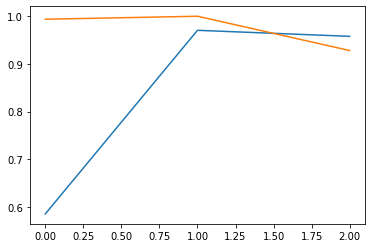

In [ ]:
t_a=history.history['acc']
v_a=history.history['val_acc']
plt.plot([i for i in range(0,len(t_a))],t_a)
plt.plot([i for i in range(0,len(v_a))],v_a)

In [ ]:
model.save("hand.h5")